## Analyze A/B Test Results

Understanding the results of an A/B test run by an e-commerce website.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As working through this notebook, we follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This assure we are on the right track as working through the project.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read dataset and get few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# number of unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# proportion of users converted
df.query('converted == 1')['user_id'].count() / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# number of times new_page and treatment don't match
df.query('landing_page == "new_page" and group != "treatment"').shape[0] + df.query('landing_page != "new_page" and group == "treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
# check any missing values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
# rows where treatment does not match with new_page or control does not match with old_page are mismatch lines
# We remove them !
# Those represent 2 groups :

# Create a dataframe for group 1: rows for which landing_page is new_page and the group is different from treatment
df_mismatch_1 = df.query('landing_page == "new_page" and group != "treatment"')

# Create a dataframe for group 2: rows for which landing_page is different from new_page and group is equal to treatment
df_mismatch_2 = df.query('landing_page != "new_page" and group == "treatment"')

# remove group 1 from df based on the indexes, get the result a temporary dataframe
df_temp = df.drop(df_mismatch_1.index, axis=0)

# remove group 2 from the temporary dataframe based on the indexes, to obtain df2
df2 = df_temp.drop(df_mismatch_2.index, axis=0)

In [4]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# number of uniques user_ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [5]:
# check duplicated user_ids
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [6]:
# row information for the repeated user_id
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [7]:
# remove one duplicated user_id line
df2.drop([2893], inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# probability of an individual converting
df2.query('converted == 1').shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# probability of an individual in the "control" group, to be converted
df_control = df2[df2['group'] == "control"]
df_control.query('converted == 1').shape[0] / df_control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# probability of an individual in the "treatment" group to be converted
df_treatment = df2[df2['group'] == "treatment"]
df_treatment.query('converted == 1').shape[0] / df_treatment.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# probability of an individual received the new page
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### Observation and response
>**For an individual in the control group and for another one in the treatment group, the probability for them to be converted are too close. Consequently, there is not enough evidence to conclude that the new treatment page leads to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Observation and response

>Null Hypothesis : **$p_{old}$** >= **$p_{new}$**  
Alternative Hypothesis : **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# conversion rate under the null
p_new = df.query('converted == 1').shape[0] / df.shape[0]
p_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df.query('converted == 1').shape[0] / df.shape[0]
p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# individuals in the treatment group
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# individuals in the control group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# simulate n_new transactions with a conversion rate of p_new
new_page_converted = df.sample(n_new, replace=True)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# simulate n_old transactions with a conversion rate of p_old
old_page_converted = df.sample(n_old, replace=True)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
# compute p_new - p_old. This is the observed statistic
sim_p_new_p_old = (new_page_converted.query('converted == 1').shape[0] / new_page_converted.shape[0]) - (old_page_converted.query('converted == 1').shape[0] / old_page_converted.shape[0])
sim_p_new_p_old

-2.928976242783099e-05

#### Observation
> **There is a tempting practical reasoning here which is to say that P_old is higher than P_new. But, this is a statistic, and we still don't know, at this step, if our sample is large enough, or not.**

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# create sampling distribution for the p_new and p_old difference
p_diffs = []

for _ in range(10000):
    # simulate n_new and n_old transaction respectively with p_new and p_old under the null
    new_page_c = df.sample(n_new, replace=True)
    old_page_c = df.sample(n_old, replace=True)
    
    # compute p_new and p_old for the simulation
    p_new_sim = new_page_c.query('converted == 1').shape[0] / new_page_c.shape[0]
    p_old_sim = old_page_c.query('converted == 1').shape[0] / old_page_c.shape[0]
    
    # add the diff in p_diffs array
    p_diffs.append(p_new_sim - p_old_sim)

In [26]:
# convert p_diffs in a NumPy Array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

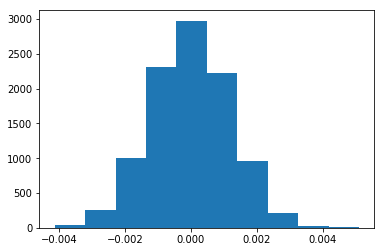

In [27]:
# plot p_diffs
plt.hist(p_diffs);

#### Observation and response
>**This is a normal distribution as expected. It means that our sample here is large enough. From a practical reasoning the outcome is clear, but we still need to confirm the Null hypothesis using the p-value.**

In [28]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

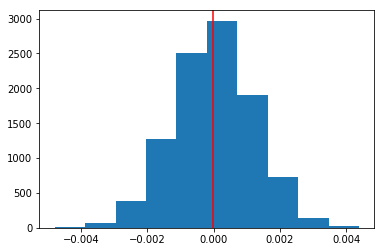

In [34]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=sim_p_new_p_old, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# compute the p-value
(null_vals > sim_p_new_p_old).mean()

0.51619999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Observation and response
>**On part (g) the observed statistic gave the impression that p_new (converted rate for the new page) is less than p_old (converted rate for the old page), which means that the Null hypothesis might be true. 
Now, clearly we have a high p-value. So we choose the Null hypothesis. This choice is also because the p-value is also higher that the 5% error rate**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [12]:
import statsmodels.api as sm

# number of conversions for old page
convert_old = (df2.query('landing_page == "old_page" and converted == 1')).shape[0]

# number of conversions for new page
convert_new = (df2.query('landing_page == "new_page" and converted == 1')).shape[0]

# number of users who landed to the old page
n_old = (df2.query('landing_page == "old_page"')).shape[0]

# number of users who landed to the new page
n_new = (df2.query('landing_page == "new_page"')).shape[0] 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
from statsmodels.stats.proportion import proportions_ztest

# count: number of success of each sample, here number of conversions for old and new page
counts = np.array([convert_old, convert_new])

# nobs: number of observations, here number of users landed to old and new page
nobs =np.array([n_old, n_new])

# compute the statistic and the p-value
stat, pval = proportions_ztest(counts, nobs)

# print the p-value
# print('{0:0.3f}'.format(pval))
(stat, pval)

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### Observation and response
>**The p-value is higher than the alpha 0.05, so we fail to reject the Null hypothesis which means the converted rate for the old page is higher or equal to the one for the new page. We reach the same conclusion as previously in (j) and (k). Those results might be because our sample is large enough.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Observation and response
>**I should be performing Logistic regression because we want to predict only 2 possibles outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [10]:
# Add an "intercept" column to df2
df2['intercept'] = 1

# Add 2 columns as dummies for "landing_page" column
# in "ab_page" we have 1 when an individual receives the treatment and 0 otherwise
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])

# Remove the column "old_page" from df2 dataframe
df2 = df2.drop('old_page', axis=1)

# Get a view of the new df2 dataframe
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [13]:
# Instantiate regression model on "intercept" and "ab_page"
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# fit the model using the 2 previous columns
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
# Get the summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:15:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [14]:
# might be useful to interpret the results
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

#### Observation and response
> **The P-value associated with ab_page is 0.19.
It differs from the one found in Part II, because here it is assessing whether we have a relationship between "ab_page" and "converted" ot not. So it helps us here to know if the conversion depends on the page the user receives or not.**  
**We are testing the conversion here. So the Alternative is "there is conversion" and the Null is "there is no conversion". From my understanding now, if there is conversion, P_new > P_old, which lead to the alternative hypothesis and consequently the assumption we had under the Null (P_old = P_new) in Part II. So those hypothesis are the same at the end.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Observation and response
>**Based on the p-value 0.19, it appears that "ab_page" does not statistically significant relationship with the conversion. Consequently it is a good idea to consider other factors into the regression model.  
We might have disadvantage adding additional terms to the model here : "ab_page" which is not significant at this step might become statistically significant due to the inclusion of a new term, or vice versa. This is risk. A way to manage that could be to study the impact of this new term to "ab_page" for example.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [15]:
# load countries file : countries.csv
df_countries = pd.read_csv('countries.csv')

# Get a view on the content
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# merge countries and df2 together, each time on the user_id
df_all = df2.merge(df_countries, on='user_id', how='inner')

# view on the new dataframe
df_all.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [39]:
# how many different countries do we have ?
df_all.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [52]:
# Add an "intercept" column to df_all
df_all['intercept'] = 1

# Create the additional columns to map the countries
df_all[['CA', 'UK', 'US']] = pd.get_dummies(df_all['country'])

# Remove the column "CA" from df_all dataframe, as we need to remove one dummy column
df_all = df_all.drop('CA', axis=1)

# Get a view of the new df_all dataframe
df_all.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,0


In [58]:
# Looking for the impact of country on the conversion
# Instantiate regression model on "intercept", "UK" and "US"
log_reg_1 = sm.Logit(df_all['converted'], df_all[['intercept', 'UK', 'US']])

# fit the model using the 2 previous columns
results_1 = log_reg_1.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [59]:
# Get the summary of the model : impact of country on the conversion
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        20:39:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

#### Observation and response
>**UK p-value is 0.074. US p-value is 0.13. Those values are in relation to CA which is our baseline. But they are all above 0.05. We can say that the country has no significant effect on the conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
# Instantiate regression model on "intercept", "ab_page", "UK" and "US"
log_reg_2 = sm.Logit(df_all['converted'], df_all[['intercept', 'ab_page', 'UK', 'US']])

# fit the model using the 2 previous columns
results_2 = log_reg_2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [55]:
# Get the summary of the model
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:38:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

#### Observation and response
>**The p-value for UK is 0.074. The one for US is 0.13. The one for ab_page is 0.19. 
Consequently, page and country have no significant effects on conversion.**

<a id='conclusions'></a>
## Conclusions

> About the probabilities: for the control group and for the treatment group, we found out that the probabilities for individuals to be converted are too close. So we could not conclude from that.

> Simulating what we believe to be possible under the Null hypothesis: We failed to reject the Null hypothesis, meaning that the conversion rate for the old page is higher or equal to the one for the new page.

> Using logistic regression approach: It appeared as a confirmation of the previous simulation under the Null. In addition, it led to assess which of the variables - amongst country and page - has a significant effect on the conversion. We found out that none of them has a significant effect to the conversion. This makes sens regarding the failure to reject the Null hypothesis.

> So regarding the approach, for A/B testing result analysis, the stidy here shows that the simulation under the Null hypothesis is the best approach. Starting from that, using a logistic regression appears relevant to assess the significance of some of the involved variables to get more deeper insights.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0